# Mortality Dataset Project 

PROBLEM STATEMENT: Trends/Changes in Mortality


**STEPS:**
```
- Data Loading
- Data Cleaning
- Descriptive Analysis
- EDA
```
**DATA:**
```
- Data is taken from CDC.gov
```

In [1]:
import pandas as pd
import numpy as np
import re
import math

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

## Data Loading

In [2]:
df = pd.read_csv("VS17MORT.csv", low_memory=False, nrows=100000) # Mortality dataset's DATAFRAME

In [3]:
df.head(5)

,Resident_Status,Education,Month_Of_Death,Sex,Age_Key,Age_Value,Age_Sub_Flag,Age_Recode_52,Age_Recode_27,Age_Recode_12,...,RA18,RA19,RA20,Race,Race_Bridged,Race_Imputation,Race_Recode_3,Race_Recode_5,Hispanic_Origin,Hispanic_Origin_Recode
0,1,,101,M,1,71,,40,20,9,...,,,,1,,,1,1,100,6
1,1,,101,M,1,74,,40,20,9,...,,,,1,,,1,1,100,6
2,1,,101,M,1,59,,37,17,8,...,,,,1,,,1,1,100,6
3,1,,101,M,1,90,,44,24,11,...,,,,3,,,2,3,100,8
4,1,,101,M,1,66,,39,19,9,...,,,,1,,,1,1,100,6


In [4]:
df.shape

(100000, 75)

In [5]:
df.columns

Index(['Resident_Status', ' Education', ' Month_Of_Death', ' Sex', ' Age_Key',
       ' Age_Value', ' Age_Sub_Flag', ' Age_Recode_52', ' Age_Recode_27',
       ' Age_Recode_12', ' Infant_Age_Recode_22', ' Place_Of_Death',
       ' Marital_Status', ' DOW_of_Death', ' Data_Year', ' Injured_At_Work',
       ' Manner_Of_Death', ' Method_Of_Disposition', ' Autopsy',
       ' Activity_Code', ' Place_Of_Causal_Injury', '  ICD10',
       ' Cause_Recode_358', ' Cause_Recode_113', ' Infant_Cause_Recode_130',
       ' Cause_Recode_39', ' Entity_Axis_Conditions', ' EAC1', ' EAC2',
       ' EAC3', ' EAC4', ' EAC5', ' EAC6', ' EAC7', ' EAC8', ' EAC9', ' EAC10',
       ' EAC11', ' EAC12', ' EAC13', ' EAC14', ' EAC15', ' EAC16', ' EAC17',
       ' EAC18', ' EAC19', ' EAC20', ' Record_Axis_Conditions', ' RA1', ' RA2',
       ' RA3', ' RA4', ' RA5', ' RA6', ' RA7', ' RA8', ' RA9', ' RA10',
       ' RA11', ' RA12', ' RA13', ' RA14', ' RA15', ' RA16', ' RA17', ' RA18',
       ' RA19', ' RA20', ' Race', ' 

In [6]:
df[" Education"].unique()

array([' '], dtype=object)

## Data Cleaning

In [7]:
def removeSpaces(item):
    regex = re.compile("\S+")
    return regex.findall(item)[0] if type(item) == str else item

def cleanColumns(dataFrame):
    return dataFrame.rename(columns=lambda x: removeSpaces(x))

In [8]:
df = cleanColumns(df)

In [9]:
df.columns

Index(['Resident_Status', 'Education', 'Month_Of_Death', 'Sex', 'Age_Key',
       'Age_Value', 'Age_Sub_Flag', 'Age_Recode_52', 'Age_Recode_27',
       'Age_Recode_12', 'Infant_Age_Recode_22', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'Activity_Code',
       'Place_Of_Causal_Injury', 'ICD10', 'Cause_Recode_358',
       'Cause_Recode_113', 'Infant_Cause_Recode_130', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4', 'EAC5',
       'EAC6', 'EAC7', 'EAC8', 'EAC9', 'EAC10', 'EAC11', 'EAC12', 'EAC13',
       'EAC14', 'EAC15', 'EAC16', 'EAC17', 'EAC18', 'EAC19', 'EAC20',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'RA5', 'RA6',
       'RA7', 'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'RA14', 'RA15',
       'RA16', 'RA17', 'RA18', 'RA19', 'RA20', 'Race', 'Race_Bridged',
       'Race_Imputation', 'Race_Recode_3', 'Race_Recode_5', 'H

In [10]:
def getInValuableColumns(dataframe):
    features = df.columns
    drop = []
    for col in features:
        feature = dataframe[col]
        if ' ' in feature.value_counts() and np.sum(feature[feature == ' '].value_counts())/dataframe.shape[0] > 0.7:
            drop.append(col)
    return drop

In [11]:
# df = df.drop(columns=[x for x in df.columns if len(df[x].unique()) <= 1 or df[x].unique()[0] == None])
df = df.drop(columns=getInValuableColumns(df))

In [12]:
def cleanEmptyStringValues(_df):
    return _df.applymap(lambda x: x if str(x) != ' ' else None)

In [13]:
df = cleanEmptyStringValues(df)

In [14]:
def fixStringValues(_df):
    return _df.applymap(lambda x: removeSpaces(x))

In [15]:
df = fixStringValues(df)

In [16]:
def replaceNAWithMode(_df):
    for column in _df.columns:
        try:
            _mode = _df[column].mode()[0]
            _df[column] = _df[column].fillna(_mode)
        except:
            pass
    return _df

In [17]:
df = replaceNAWithMode(df)

In [18]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'ICD10',
       'Cause_Recode_358', 'Cause_Recode_113', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'Race', 'Race_Recode_3',
       'Race_Recode_5', 'Hispanic_Origin', 'Hispanic_Origin_Recode'],
      dtype='object')

In [19]:
df.columns.size

33

In [20]:
def tryConvertingToNumber(value):
    try:
        val = int(value)
        return val
    except:
        return value

df = df.applymap(tryConvertingToNumber)

In [21]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'ICD10',
       'Cause_Recode_358', 'Cause_Recode_113', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'Race', 'Race_Recode_3',
       'Race_Recode_5', 'Hispanic_Origin', 'Hispanic_Origin_Recode'],
      dtype='object')

In [22]:
df.head()

,Resident_Status,Month_Of_Death,Sex,Age_Key,Age_Value,Age_Recode_52,Age_Recode_27,Age_Recode_12,Place_Of_Death,Marital_Status,...,EAC3,Record_Axis_Conditions,RA1,RA2,RA3,Race,Race_Recode_3,Race_Recode_5,Hispanic_Origin,Hispanic_Origin_Recode
0,1,101,M,1,71,40,20,9,1,M,...,31I10,1,G20,F179,I469,1,1,1,100,6
1,1,101,M,1,74,40,20,9,1,D,...,31I10,2,M726,A419,I469,1,1,1,100,6
2,1,101,M,1,59,37,17,8,4,M,...,31I10,2,C159,F179,I469,1,1,1,100,6
3,1,101,M,1,90,44,24,11,4,M,...,31I10,1,C61,F179,I469,3,2,3,100,8
4,1,101,M,1,66,39,19,9,4,M,...,62F179,3,J449,C900,F179,1,1,1,100,6


In [23]:
df.tail()

,Resident_Status,Month_Of_Death,Sex,Age_Key,Age_Value,Age_Recode_52,Age_Recode_27,Age_Recode_12,Place_Of_Death,Marital_Status,...,EAC3,Record_Axis_Conditions,RA1,RA2,RA3,Race,Race_Recode_3,Race_Recode_5,Hispanic_Origin,Hispanic_Origin_Recode
99995,1,103,F,1,97,45,25,11,1,W,...,22J960,5,I350,A419,I499,1,1,1,100,6
99996,1,103,F,1,76,41,21,10,5,S,...,31I10,2,I251,I500,I469,1,1,1,100,6
99997,1,103,F,1,90,44,24,11,4,D,...,31I10,2,I251,I500,I469,1,1,1,210,1
99998,2,102,M,1,55,37,17,8,1,D,...,31I10,1,C349,F179,I469,1,1,1,100,6
99999,1,103,M,1,71,40,20,9,4,D,...,31I10,1,E142,F179,I469,1,1,1,210,1


### Actual usable columns for the dataset(s):

In [24]:
f"Usable Columns: {df.shape[1]}"

'Usable Columns: 33'

## Descriptive Statistics

In [25]:
for column in df.columns:
    try:
        mean = df[column].mean()
        if mean > 0:
            print(df[column].describe())
    except:
        pass

count    100000.000000
mean          1.242160
std           0.501279
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: Resident_Status, dtype: float64
count    100000.000000
mean        105.943550
std           3.655122
min         101.000000
25%         103.000000
50%         106.000000
75%         109.000000
max         112.000000
Name: Month_Of_Death, dtype: float64
count    100000.000000
mean          1.021740
std           0.272228
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: Age_Key, dtype: float64
count    100000.000000
mean         71.433610
std          18.939738
min           1.000000
25%          62.000000
50%          74.000000
75%          85.000000
max         999.000000
Name: Age_Value, dtype: float64
count    100000.000000
mean         39.719780
std           4.496265
min           1.000000
25%          38.000000
50%         

In [26]:
Q1 = df["Age_Value"].quantile(0.25)
Q3 = df["Age_Value"].quantile(0.75)

print("INTER-QUARTILE RANGE (IQR) For Age:", Q3-Q1)

INTER-QUARTILE RANGE (IQR) For Age: 23.0


In [27]:
print("Life Expectancy regarless of gender: {}(mean) {}(median) {}(mode)".format(round(df["Age_Value"].mean()), df["Age_Value"].median(), df["Age_Value"].mode()[0]))

Life Expectancy regarless of gender: 71.0(mean) 74.0(median) 82(mode)


In [28]:
mD = df[df["Sex"] == "M"]
print("Life Expectancy for Males: {}(mean) {}(median) {}(mode)".format(round(mD["Age_Value"].mean()), mD["Age_Value"].median(), mD["Age_Value"].mode()[0]))

Life Expectancy for Males: 69.0(mean) 71.0(median) 74(mode)


In [29]:
fD = df[df["Sex"] == "F"]
print("Life Expectancy for Females: {}(mean) {}(median) {}(mode)".format(round(fD["Age_Value"].mean()), fD["Age_Value"].median(), fD["Age_Value"].mode()[0]))

Life Expectancy for Females: 75.0(mean) 78.0(median) 87(mode)


## Exploratry Data Analysis (EDA)

### If married people die more than unmarried and other related

In [30]:
dfMarried = df[(df['Marital_Status'] == 'M') ]

In [31]:
dfSingle = df[(df['Marital_Status'] == 'S') ]

In [32]:
dfWidow = df[(df['Marital_Status'] == 'W') ]

In [33]:
dfDivorce = df[(df['Marital_Status'] == 'D') ]

In [34]:
dfUnknown = df[(df['Marital_Status'] == 'U') ]

In [35]:
marriedPer = dfMarried.shape[0] / df.shape[0] * 100
str(math.ceil(marriedPer)) + ' %'

'39 %'

In [36]:
singlePer = dfSingle.shape[0] / df.shape[0] * 100
str(math.ceil(singlePer)) + ' %'

'12 %'

In [37]:
widowPer = dfWidow.shape[0] / df.shape[0] * 100
str(math.ceil(widowPer)) + ' %'

'32 %'

In [38]:
divorcePer = dfDivorce.shape[0] / df.shape[0] * 100
str(math.ceil(divorcePer)) + ' %'

'18 %'

In [39]:
unknownPer = dfUnknown.shape[0] / df.shape[0] * 100
str(math.ceil(unknownPer)) + ' %'

'1 %'

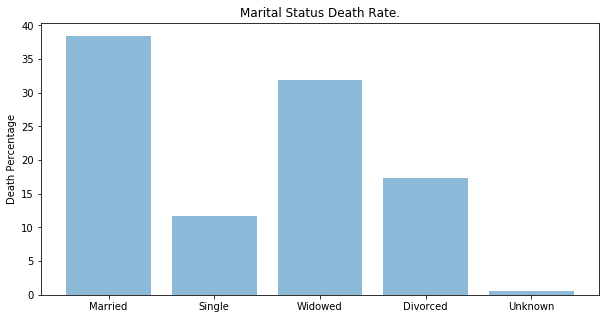

In [40]:

objects = ('Married', 'Single', 'Widowed', 'Divorced', 'Unknown')
y_pos = np.arange(len(objects))
percentages = [marriedPer, singlePer, widowPer, divorcePer, unknownPer]
plt.figure(figsize=(10,5))
plt.bar(y_pos, percentages, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Death Percentage')
plt.title('Marital Status Death Rate.')

plt.show();

### What are and will be the most common causes of death (This requires ML and right now is only w/o ML part)

In [41]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'ICD10',
       'Cause_Recode_358', 'Cause_Recode_113', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'Race', 'Race_Recode_3',
       'Race_Recode_5', 'Hispanic_Origin', 'Hispanic_Origin_Recode'],
      dtype='object')

In [42]:
objects = ['Accident', 'Suicide', 'Homicide', 'Pending investigation', 'Could not determine', 'Self-Inflicted', 'Natural']

In [43]:
len(objects)

7

In [44]:
sortedCauseOfDeath = sorted(df["Manner_Of_Death"].unique())

In [45]:
labels = [objects[x-1] for x in sortedCauseOfDeath]

In [46]:
def getColumnPercentages(_df, column):
    return [((_df[_df[column] == uVal].shape[0]/_df[column].shape[0])*100) for uVal in sorted(_df[column].unique())]

In [47]:
deathCausePcts = getColumnPercentages(df, "Manner_Of_Death")

In [48]:
len(deathCausePcts)

6

In [49]:
for i in range(0, len(deathCausePcts)):
    print(f"{labels[i]}: {deathCausePcts[i]}%");

Accident: 5.028%
Suicide: 1.894%
Homicide: 1.051%
Pending investigation: 0.10300000000000001%
Could not determine: 0.628%
Natural: 91.29599999999999%


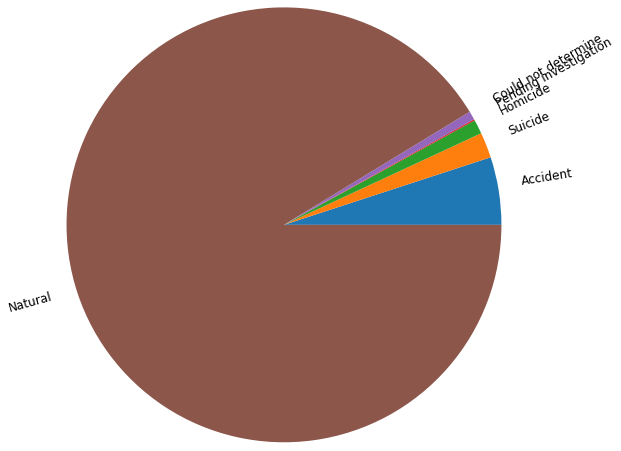

In [50]:
# percentages = [manner1Per, manner2Per, manner3Per, manner4Per, manner5Per, manner6Per, manner7Per]
# idx = deathCausePcts.index(0.0)
# percentages = deathCausePcts[:idx] + deathCausePcts[idx+1:]
# objects = objects[:idx] + objects[idx+1:]
plt.figure(figsize=(10,5))
plt.pie(
    x=deathCausePcts,
    labels=labels,
    rotatelabels=45,
    radius=2,
    textprops={
        "fontsize": 12
    }
)
# plt.bar(y_pos, percentages, align='center', alpha=0.5)
# plt.xticks(y_pos, objects, rotation=30)
# plt.ylabel('Death Percentage')
# plt.title('Most Common Causes Of Death.')
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
plt.show();

### Life expectancy for certain age groups

In [51]:
def getGroupedValues(dataF, colName, gap, total, isLast = False):
    pValue = 0
    nValue = gap
    values = []
    for i in range(0, total):
        values.append(dataF[(dataF[colName] >= pValue) & (dataF[colName] < nValue)].shape[0])
#         print(f"{pValue} - {nValue}")
        pValue = nValue
        nValue += gap
    if isLast:
        values.append(dataF[dataF[colName] >= nValue].shape[0])
    return values

In [52]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'ICD10',
       'Cause_Recode_358', 'Cause_Recode_113', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'Race', 'Race_Recode_3',
       'Race_Recode_5', 'Hispanic_Origin', 'Hispanic_Origin_Recode'],
      dtype='object')

[916, 722, 1931, 2564, 4421, 10515, 17884, 22991, 24858, 12456, 7]


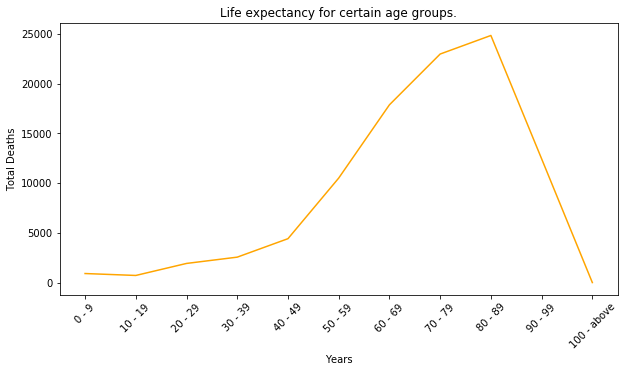

In [53]:
year = ['0 - 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '100 - above']
numberOfDeaths = getGroupedValues(df, "Age_Value", 10, len(year)-1, True)
print(numberOfDeaths)
plt.figure(figsize=(10,5))
plt.plot(year, numberOfDeaths, color='orange')
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Total Deaths')
plt.title('Life expectancy for certain age groups.')
plt.show()

### Death Rate Comparison/Correlation between both genders

In [54]:
maleData = df[df["Sex"] == "M"]

maleData.shape

(51855, 33)

In [55]:
femaleData = df[df["Sex"] == "F"]

femaleData.shape

(48145, 33)

In [56]:
c_years = year[:-2]
c_years.append('90 - 100')
c_years.append('100 - above')

In [57]:
maleDeaths = getGroupedValues(maleData, "Age_Value", 10, len(c_years)-1, True)
femaleDeaths = getGroupedValues(femaleData, "Age_Value", 10,len(c_years)-1, True)

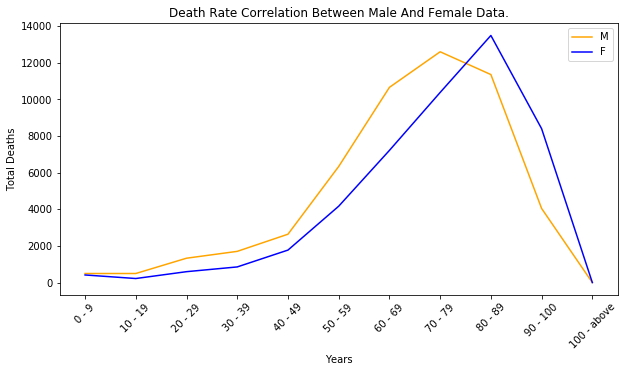

In [58]:
plt.figure(figsize=(10,5))
plt.plot(c_years, maleDeaths, color='orange')
# plt.show()
plt.plot(c_years, femaleDeaths, color='blue')
plt.legend(df["Sex"].unique())
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Total Deaths')
plt.title('Death Rate Correlation Between Male And Female Data.')
plt.show()

### How causes of death have changed compared to past 10 years

In [59]:
odf = pd.read_csv("VS07MORT.csv", nrows=100000)

odf.columns

Index(['Resident_Status', ' Education', ' Month_Of_Death', ' Sex', ' Age_Key',
       ' Age_Value', ' Age_Sub_Flag', ' Age_Recode_52', ' Age_Recode_27',
       ' Age_Recode_12', ' Infant_Age_Recode_22', ' Place_Of_Death',
       ' Marital_Status', ' DOW_of_Death', ' Data_Year', ' Injured_At_Work',
       ' Manner_Of_Death', ' Method_Of_Disposition', ' Autopsy',
       ' Activity_Code', ' Place_Of_Causal_Injury', '  ICD10',
       ' Cause_Recode_358', ' Cause_Recode_113', ' Infant_Cause_Recode_130',
       ' Cause_Recode_39', ' Entity_Axis_Conditions', ' EAC1', ' EAC2',
       ' EAC3', ' EAC4', ' EAC5', ' EAC6', ' EAC7', ' EAC8', ' EAC9', ' EAC10',
       ' EAC11', ' EAC12', ' EAC13', ' EAC14', ' EAC15', ' EAC16', ' EAC17',
       ' EAC18', ' EAC19', ' EAC20', ' Record_Axis_Conditions', ' RA1', ' RA2',
       ' RA3', ' RA4', ' RA5', ' RA6', ' RA7', ' RA8', ' RA9', ' RA10',
       ' RA11', ' RA12', ' RA13', ' RA14', ' RA15', ' RA16', ' RA17', ' RA18',
       ' RA19', ' RA20', ' Race', ' 

In [60]:
odf.shape

(100000, 75)

In [61]:
odf = cleanEmptyStringValues(odf)

odf = replaceNAWithMode(odf)

In [62]:
odf = cleanColumns(odf)

In [63]:
odf = odf.drop(columns=[x for x in odf.columns if len(odf[x].unique()) <= 1 and odf[x].unique()[0] == None])

In [64]:
odf = odf.applymap(tryConvertingToNumber)

In [65]:
odf.columns

Index(['Resident_Status', 'Education', 'Month_Of_Death', 'Sex', 'Age_Key',
       'Age_Value', 'Age_Sub_Flag', 'Age_Recode_52', 'Age_Recode_27',
       'Age_Recode_12', 'Infant_Age_Recode_22', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'Activity_Code',
       'Place_Of_Causal_Injury', 'ICD10', 'Cause_Recode_358',
       'Cause_Recode_113', 'Infant_Cause_Recode_130', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4', 'EAC5',
       'EAC6', 'EAC7', 'EAC8', 'EAC9', 'EAC10', 'EAC11', 'EAC12', 'EAC13',
       'EAC14', 'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'RA5',
       'RA6', 'RA7', 'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'RA14',
       'Race', 'Race_Imputation', 'Race_Recode_3', 'Race_Recode_5',
       'Hispanic_Origin', 'Hispanic_Origin_Recode'],
      dtype='object')

### Old (Other Dataset) Data Cleaning and Analysis

In [66]:
sortedCauses = sorted(odf["Manner_Of_Death"].unique())

sortedCauses

[1, 2, 3, 4, 5, 7]

In [67]:
oldDeathPcts = getColumnPercentages(odf, "Manner_Of_Death")

In [68]:
for i in range(0, len(oldDeathPcts)):
    print(f"{labels[i]}: {math.floor(oldDeathPcts[i])}%")

Accident: 6%
Suicide: 1%
Homicide: 1%
Pending investigation: 0%
Could not determine: 0%
Natural: 90%


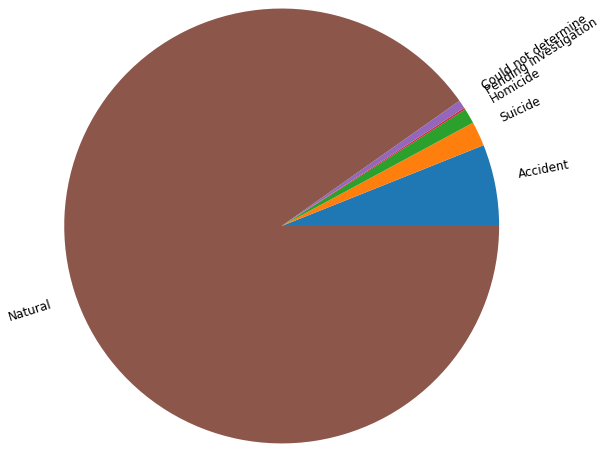

In [69]:
plt.figure(figsize=(10,5))
plt.pie(
    x=oldDeathPcts,
    labels=labels,
    rotatelabels=45,
    radius=2,
    textprops={
        "fontsize": 12
    }
)

plt.show()

**Comparison between 10 years past and 2017 Death rates:**

In [70]:
for i in range(0, min(len(oldDeathPcts), len(deathCausePcts))):
    print(f"{labels[i]}: {math.ceil(oldDeathPcts[i])}%(old), {math.ceil(deathCausePcts[i])}%(current)")

Accident: 7%(old), 6%(current)
Suicide: 2%(old), 2%(current)
Homicide: 2%(old), 2%(current)
Pending investigation: 1%(old), 1%(current)
Could not determine: 1%(old), 1%(current)
Natural: 91%(old), 92%(current)


In [71]:
len(deathCausePcts)

6

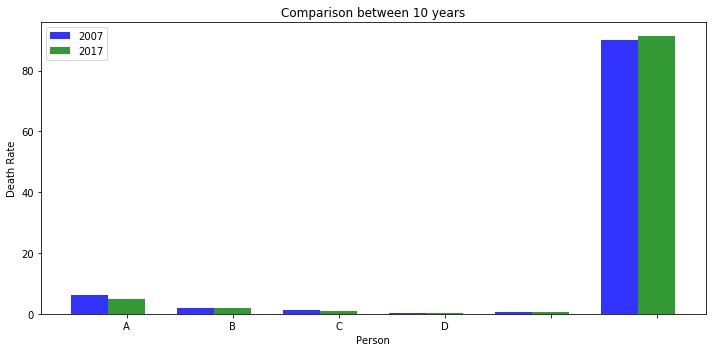

In [72]:
n_groups = len(deathCausePcts)

# create plot
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, oldDeathPcts, bar_width,
alpha=opacity,
color='b',
label='2007')

rects2 = plt.bar(index + bar_width, deathCausePcts, bar_width,
alpha=opacity,
color='g',
label='2017')
plt.xlabel('Person')
plt.ylabel('Death Rate')
plt.title('Comparison between 10 years')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()

plt.tight_layout()
plt.show()

### Death of people which Injured at work

In [73]:
dfInjuredAtWork = df[(df['Injured_At_Work'] == 'Y') ]
injuredAtWorkPer = dfInjuredAtWork.shape[0] / df.shape[0] * 100
str(injuredAtWorkPer) + ' %'


'0.202 %'

In [74]:
dfNotInjuredAtWork = df[(df['Injured_At_Work'] == 'N') ]
notInjuredAtWorkPer = dfNotInjuredAtWork.shape[0] / df.shape[0] * 100
str(notInjuredAtWorkPer) + ' %'

'7.819 %'

In [75]:

dfUnknownInjuredAtWork = df[(df['Injured_At_Work'] == 'U') ]
unknownInjuredAtWorkPer = dfUnknownInjuredAtWork.shape[0] / df.shape[0] * 100
str(unknownInjuredAtWorkPer) + ' %'

'91.979 %'

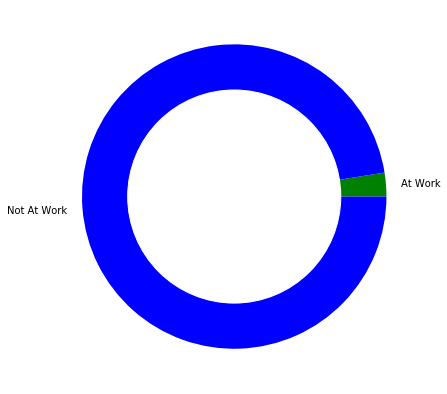

In [76]:

names='At Work', 'Not At Work'

my_circle=plt.Circle( (0,0), 0.7, color='white')
size= [injuredAtWorkPer, notInjuredAtWorkPer]
# Custom colors --> colors will cycle
plt.figure(figsize=(7,7))
plt.pie(size, labels=names, colors=['green','blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


### Finding Most common disease using International Statistical Classification of Diseases and Related Health Problems

In [77]:
df.head()

,Resident_Status,Month_Of_Death,Sex,Age_Key,Age_Value,Age_Recode_52,Age_Recode_27,Age_Recode_12,Place_Of_Death,Marital_Status,...,EAC3,Record_Axis_Conditions,RA1,RA2,RA3,Race,Race_Recode_3,Race_Recode_5,Hispanic_Origin,Hispanic_Origin_Recode
0,1,101,M,1,71,40,20,9,1,M,...,31I10,1,G20,F179,I469,1,1,1,100,6
1,1,101,M,1,74,40,20,9,1,D,...,31I10,2,M726,A419,I469,1,1,1,100,6
2,1,101,M,1,59,37,17,8,4,M,...,31I10,2,C159,F179,I469,1,1,1,100,6
3,1,101,M,1,90,44,24,11,4,M,...,31I10,1,C61,F179,I469,3,2,3,100,8
4,1,101,M,1,66,39,19,9,4,M,...,62F179,3,J449,C900,F179,1,1,1,100,6


In [78]:
icd10 = (df.ICD10.value_counts()/df.ICD10.shape[0]* 100)[0:20]
icd10

J449    5.594
C349    5.366
I219    5.075
G309    4.501
I251    3.798
I500    2.907
F03     2.731
I64     2.008
I469    1.864
I250    1.743
J189    1.663
A419    1.457
C189    1.372
C509    1.301
C259    1.299
E149    1.297
G20     1.018
C80     0.981
I119    0.957
I259    0.915
Name: ICD10, dtype: float64

In [79]:
icd10.values

array([5.594, 5.366, 5.075, 4.501, 3.798, 2.907, 2.731, 2.008, 1.864,
       1.743, 1.663, 1.457, 1.372, 1.301, 1.299, 1.297, 1.018, 0.981,
       0.957, 0.915])

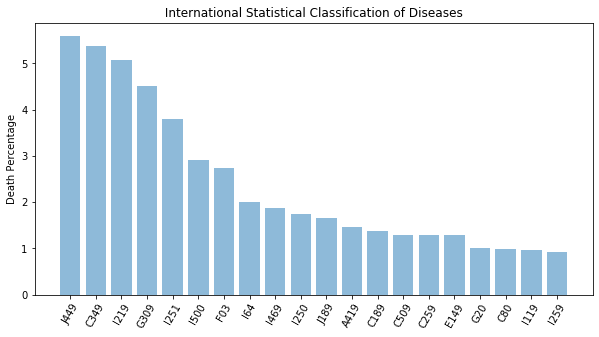

In [80]:

#objects = ('Married', 'Single', 'Widowed', 'Divorced', 'Unknown')
y_pos = np.arange(len(icd10.index))
#percentages = [marriedPer, singlePer, widowPer, divorcePer, unknownPer]

plt.figure(figsize=(10,5))
plt.bar(y_pos, icd10.values, align='center', alpha=0.5)
plt.xticks(y_pos, icd10.index, rotation=60)
plt.ylabel('Death Percentage')
plt.title(' International Statistical Classification of Diseases ')
plt.show();

According to the data, **C349** was the most common disease of death among the deceased.

According to [wikipidia](https://en.wikipedia.org/wiki/ICD-10_Chapter_II:_Neoplasms#(C30%E2%80%93C39)_Malignant_neoplasms,_respiratory_system_and_intrathoracic_organs) / [(C34)](https://en.wikipedia.org/wiki/Lung_cancer) series belongs to **Malignant neoplasm of bronchus and lung**

## Transforming data (For Machine Learning Training)

In [423]:
# Models
from sklearn.ensemble import RandomForestClassifier

# Metrics and utility
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [258]:
df.shape

(100000, 33)

### Predicting Marital Status based on details of the person's death (Multiclass Classification)

In [259]:
def mapStringToNumbers(feature):
    unq = feature.unique().tolist()
    return (feature.apply(unq.index), unq)

In [260]:
def mapFeature(feature):
    return mapStringToNumbers(feature)[0] if feature.dtype == type(object) else feature

In [261]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'ICD10',
       'Cause_Recode_358', 'Cause_Recode_113', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'Race', 'Race_Recode_3',
       'Race_Recode_5', 'Hispanic_Origin', 'Hispanic_Origin_Recode'],
      dtype='object')

In [528]:
invalCols = [
    "EAC1",
    "EAC2",
    "EAC3",
    "ICD10",
    "Age_Key",
    "Age_Recode_52",
    "Age_Recode_27",
    "Age_Recode_12",
    "Data_Year",
    "Cause_Recode_39",
    "Cause_Recode_358",
    "Cause_Recode_113",
    "Cause_Recode_39",
    "RA1",
    "RA2",
    "RA3",
    "Race_Recode_3",
    "Race_Recode_5",
    "Hispanic_Origin_Recode",
]

In [529]:
features = df.drop(columns=invalCols).copy()

In [530]:
target, maritalMapping = mapStringToNumbers(features["Marital_Status"])

In [531]:
features = features.drop(columns=["Marital_Status"])

In [532]:
features = features.apply(mapFeature)

In [536]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [537]:
clf = RandomForestClassifier(max_depth=12, n_estimators=20, random_state=42)
martialPredictor = clf.fit(X_train, y_train)
maritalPrediction = martialPredictor.predict(X_test)

In [557]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [558]:
rcf = RandomizedSearchCV(estimator=clf, param_distributions=random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rcf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.4min


In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
evaluate(rcf, X_test, y_test)

In [552]:
"{:0.0f}.0 %".format(accuracy_score(y_test, maritalPrediction)*100)

'58.0 %'

### Saving model training

In [95]:
# from sklearn.externals import joblib

# joblib.dump(NB, "iris_naive_bayes.pkl")

In [96]:
# NB = joblib.load("iris_naive_bayes.pkl")